# Table of Contents

1. [Model Building](#mbuild)
2. [Pretrained Model Weights Loading](#mload)
3. [Model Prediction](#mpredict)


In [1]:
#Imports the print function from newer versions of python
from __future__ import print_function

%tensorflow_version 1.x
%matplotlib inline

TensorFlow 1.x selected.


In [2]:
!git clone https://github.com/zeeshanalipnhwr/Semantic-Segmentation-Keras
!mv Semantic-Segmentation-Keras Semantic_Segmentation_Keras

Cloning into 'Semantic-Segmentation-Keras'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 775 (delta 63), reused 0 (delta 0), pack-reused 635
Receiving objects: 100% (775/775), 67.28 MiB | 29.79 MiB/s, done.
Resolving deltas: 100% (389/389), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Model Building<a id='mbuild'><\a>

In [4]:
# import all the models and their respective configuration files
from Semantic_Segmentation_Keras.Models import SegNet, UNet, DeepLabV3
from Semantic_Segmentation_Keras.Configs import SegNet_Configs, UNet_Configs, DeepLabV3_Configs

# create a model of your choice among the above availabe models
model = SegNet.SegNet(depth=SegNet_Configs.DEPTH).SegNet(input_shape=(None,None, 3))
#model = UNet.SegNet(depth=UNet_Configs.DEPTH).UNet(input_shape=(None, None, 3))
#model = DeepLabV3.DeepLabV3(depth=DeepLabV3_Configs.DEPTH).DeepLabV3(input_shape=(None, None, 3))

# optionally view the created model summary
model.summary()

Using TensorFlow backend.














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 6 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, None, None, 6 36928       batch_normalization_1[0][0]      
________________________________________________________________________________

# Pretrained Model Weights Loading<a id='mload'><\a>

In [0]:
model.load_weights("drive/My Drive/segnet_basic.model")

# Model Predictions

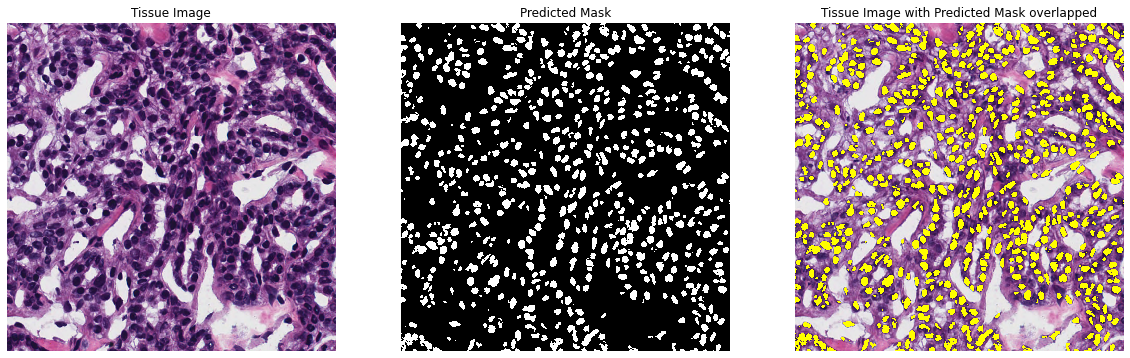

In [19]:
from Semantic_Segmentation_Keras.Utils import display
import numpy as np
import cv2

print_statements = False # do you need to see the print results blow?

# load a sample image
image_path = "drive/My Drive/sample_tissue_image.tif"
sample_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
sample_image = np.array(sample_image, dtype="float") / 255.0
sample_image = np.expand_dims(sample_image, axis=0)
if print_statements: print ("sample_image shape:", sample_image.shape)

# in order to avoid a crash of model, make sure the image spatial dimentions are a multiple of 16
# the multiple factor 16 represented the ratio to which the actual image is reduced to by a model
padx, pady = 0, 0 # number zeros to add in x and y respectively
origional_sample_image_shape = sample_image.shape
if print_statements: print ("origional_sample_image_shape", origional_sample_image_shape)

if sample_image.shape[1]//16 != sample_image.shape[1]/16:
    padx = int(2**round(np.log2(sample_image.shape[1]))-sample_image.shape[1])//2
if sample_image.shape[2]//16 != sample_image.shape[2]/16:
    pady = int(2**round(np.log2(sample_image.shape[2]))-sample_image.shape[2])//2
if print_statements: print ("padx={}, pady={}".format(padx, pady))

sample_image_padded = np.zeros((1, sample_image.shape[1]+2*padx,
                                  sample_image.shape[2]+2*pady, 3))
if print_statements: print ("sample_image_padded shape", sample_image_padded.shape)

sample_image_padded[:, padx:padx+sample_image.shape[1],
                      pady:pady+sample_image.shape[2], :] = sample_image
sample_image = sample_image_padded
if print_statements: print ("sample_image shape:", sample_image.shape)

# make prediction for a sample on the network
prediction = model.predict(sample_image)
prediction = prediction.round(0)
if print_statements: print ("prediction shape:", prediction.shape)

# discard the predictions for the padded portion of sample_image
prediction = prediction[:, padx:padx+origional_sample_image_shape[1],
                          pady:pady+origional_sample_image_shape[2], :]
if print_statements: print ("prediction shape:", prediction.shape)

# remove the padded zeros from sample_image
sample_image = sample_image[:, padx:padx+origional_sample_image_shape[1],
                                pady:pady+origional_sample_image_shape[2], :]
if print_statements: print ("sample_image shape:", sample_image.shape)

# display the sample image along with its predicted mask
display.display_masked(sample_image[0], prediction[0], "Tissue Image", "Predicted Mask")